# Introduction to the toyneuralnetwork toolbox

### Standard libraries and the three classes of the tool box ToyNN (ToyPb, nD_data, ToyNN)

In [2]:
import numpy as np
from numpy import random as nprd
from matplotlib import pyplot as plt
#from matplotlib import cm as cm
from toyneuralnetwork import *

__(look at the companion note for the description of the classes).__

### We  start by choosing a problem ###

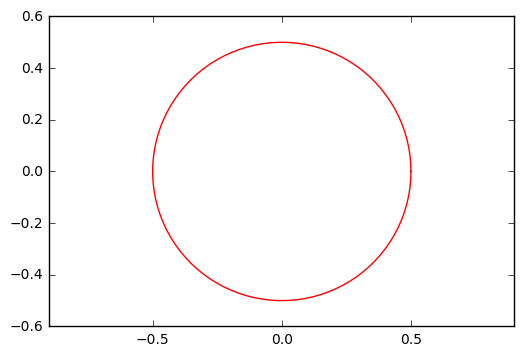

In [3]:
pb = ToyPb(name = "disc", bounds = (-1,1), loss = "softplus")
pb.show_border()
plt.show()

__The classicfiacation problem is defined by a function__ f= pb.f. __We want to classify the points $X$ of the square $[-1,1]\times[-1,1]$ such that $f(X)<0$.__

__The error in this classification will be measured with the help of the function__ $\ell=$ pb.loss. __If $y\in\{\pm1\}$ is the sign of $f(X)$, the error of a prediction $\widehat y\in \mathbb{R}$ is given by $\ell(y\widehat y)$.__

__The attribute__ pb.loss_prime __is supposed to implement the derivative $\ell'$ of $\ell$.__

### Next we choose pick set of data that fit the problem. 

(1000, 2) (1000,)


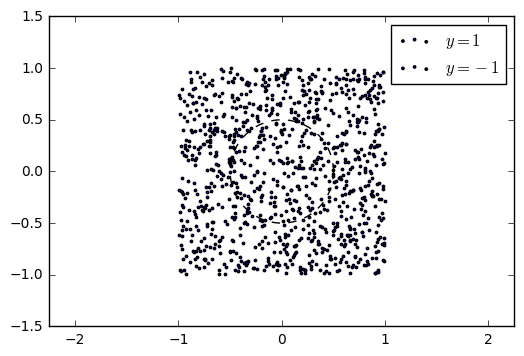

In [5]:
ndata = 1000
DATA = nD_data(n = ndata, pb = pb)
print(DATA.X.shape, DATA.Y.shape)

DATA.show_class()

pb.show_border('k--')
plt.legend(loc=1)
plt.show()

__The array__ DATA.Y __have length $ndata$ and contains a list of values__ DATA.Y[j] __into $\{-1,1\}$ according to whether__ pb.f(DATA.[j])__$<0$ or not.__

### We also build a set of test data to assess how far we are from solving the classification problem "pb". 

(100, 2) (100,) (100,)


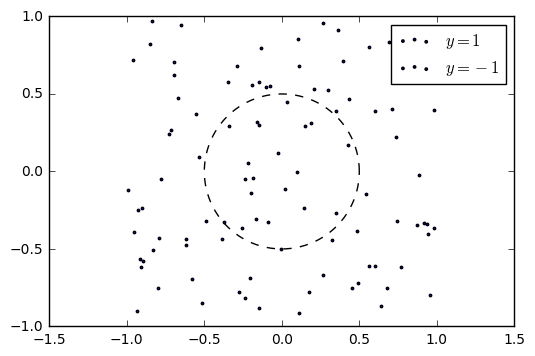

In [6]:
ntest = 100
TEST = nD_data(n = ntest, pb = pb, init_pred='yes')
print(TEST.X.shape, TEST.Y.shape, TEST.Ypred.shape)
TEST.show_class()
pb.show_border('k--')
plt.legend(loc=1)
plt.show()

__The input__ "init_pred='yes'" __is here for initializing an array $Y_{pred}$. From time to time, along the iterations, this array is updated to contain the predictions of the neural network on the set of test data. It is only used for graphic display.__

### We eventually build a randomly intialized neural network (with 2 input nodes and one output node).

In [7]:
CardNodes = (2, 4, 6, 1)
NN = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))
NN.show()

AttributeError: Unknown property fc

NN.card = CardNodes __is a tuple which contains the number of nodes of the succesive layers of__ NN.

__The number of layers is__ NN.N + 1.

NN.W __and__ NN.Bias __contain the coefficients of the neural network.__

NN.Nparam __is the total number of entries of__ NN.W __and__ NN.Bias __which is the number of degrees of freedom in the optimization problem.__

N.chi __is the activation function of the neural network.__

__The grid option creates a grid of points used by the method__ NN.show_pred() __to display the predictions of the neural network.__ 

In [ ]:
print("Number of parameters of NN, NN.Param=",NN.Nparam)
print("number of interlayers, NN.N=",NN.N)
print("\n")
for n in range(NN.N):
    print("NN.W[{}] = ".format(n), NN.W[n], "\n")
print()
for n in range(NN.N):
    print("NN.Bias[{}] = ".format(n), NN.Bias[n], "\n")

### the NN.output and NN.descent methods. 

__Let us note $N_0^{(n)},\dots,N^{(n)}_{CardN[n]}$ the nodes of the layer $n$ of the neural network.__ 

__The weights on the edges are stored in the list of (numpy) arrays: W. For $n=0,\dots,N-1$, the entries of__ w=W[n] __are the weights on the edges between the nodes of the layer $n$ and the nodes of the layer $n+1$. More precisely,__ w[j,k] __is the weight on the edge which links the node $N_j^{(n)}$ to the node $N_k^{(n+1)}$.__    

__Similarly, the biasses are stored in the list of arrays: Bias. For $n=0,\dots,N-1$,__ bias=Bias[n] __is the array of biasses on the nodes of layer $n+1$.__

__To an input data $X$, the system associates a value to each node $N_j^{(n)}$, $n=0,\cdots,N-1$ an outer value $O_j^{(n)}$ and to each node $N_j^{(n)}$, $n=1,\cdots,N$ an inner value  $I_j^{(n - 1)}$ computed as follows:__

1.   __The $O_j^{(0)}$ are the $X_j$.__ 
2.   __Then by induction, for $n=0,\dots, N-2$, $$\forall \,k\in\{0,\cdots,CardN[n+1]\}  \qquad I_k^{(n)}:=Bias[n][k]+\sum_j W[n][j,k]\, O_j^{(n)},\qquad O_k^{(n+1)}=\chi\left(I_k^{(n+1)}\right)$$__
3.   __Eventually, the final output is $$\widehat{f}(W,Bias;X)=I_0^{(N-1)}:=Bias[N-1][0]+\sum_j W[N-1][j,0] \,O_j^{(N-1)}.$$__

__The output of the neural network for an input vector $X$ is obtained by using__ NN.ouput(X).

In [ ]:
X=[-0.5, 0.75]
ypred = NN.output(X)
print(ypred)

__The methods__ NN.prediction __and__ TEST.prediction __use the method__ NN.output() __to compute and display the predictions of the neural network.__  

__The method__ NN.show_pred ___displays these predictions.

In [ ]:
ntest = 40
TEST = nD_data(n = ntest, pb = pb, init_pred='yes')
TEST.prediction(NN=NN)  ## EQUIVALENT
NN.prediction(DATA=TEST)      ## METHODS
NN.show_pred()

__If you activate the option__ "zero_one" __the prediction is set to $-1$ for negative outputs and $1$ for positive outputs.__

In [ ]:
NN.prediction(DATA=TEST, zero_one="yes") 
TEST.Ypred

__To compute the gradient of the output $\widehat{f}(\text{NN.W},\,\text{NN.Bias};X)$ with respect to the coefficients of__ NN.W __and__ NN.Bias __(__ X __being given), we use the method__ NN.descent().

In [ ]:
X=[-0.5, 0.75]
grad_W, grad_Bias = NN.descent(X=X)

__Like__ NN.W __and__ NN.Bias, grad_W __and__ grad_Bias __are lists of numpy arrays but (due to th backward method of computation) they are disposed in reverse order so that:__ 

grad_W[n].shape = NN.W[-1-n].shape __and__  grad_W[n].Bias = NN.W[-1-n].Bias.

__The method__ NN.add_to_coefs(grad_W, grad_Bias) __takes this specifity into account and implements the increments:__

NN.W += grad_W.reverse() __and__  NN.Bias += grad_Bias.reverse() 

In [ ]:
print(NN.W[1], "\n")

print(grad_W[-2],"\n")

NN.add_to_coefs(grad_W, grad_Bias) 

print(NN.W[1])

__Let us note $\widehat y$ the output produced by__ NN __with input data $X$ and $y\in\{-1,1\}$ the correct classification of $X$.  In practice, we do not need the gradient $\widehat y$ but the gradient of $\ell(\widehat y \,y)$ multiplied by the opposite of the step $\tau$, that is the coefficient__ __$-\tau y \ell'(\widehat y \,y) $__

__We get this by specifying more parameters (__ X, y, f$=\ell'$, tau __) to the method__ NN.descent.

In [ ]:
X=[-0.5, 0.75]
t=.1
g = lambda s:np.exp(-s)
desc_W, desc_Bias = NN.descent(X=X, y=1, f=g, tau = t)
NN.add_to_coefs(desc_W, desc_Bias)

__It is also possible to specify an object__ pb __of the class__ ToyPb __in place
of__ f __, in this case the function__ pb.loss_prime __is used for $\ell'$.__

In [ ]:
desc_W, desc_Bias = NN.descent(X=X, y=1, pb=pb, tau = t)
NN.add_to_coefs(desc_W, desc_Bias)

__The elements of the__ toyNN  __class can have the attributes__ NN.DW, NN.Dbias  __which have the same format as__  desc_W __and__ desc_Bias __above.

__In the following bthen incremented twicepuis on les incrémente deux fois__ (NN.add_to_vector) __and then averaged__ (NN.mult_vector(0.5)). __They are eventually added to__ NN.W, NN.Bias __by__  N.add_vector_to_coefs().

In [ ]:
NN.init_vector()

X=[-.5,.75]
Desc_W, Desc_Bias = NN.descent(X=X, y=1, pb=pb, tau= t)
NN.add_to_vector(Desc_W, Desc_Bias)

X2=[0,.3]
Desc_W, Desc_Bias = NN.descent(X=X2, y=-1, pb=pb, tau= t)
NN.add_to_vector(Desc_W, Desc_Bias)

NN.mult_vector(0.5)             
NN.add_vector_to_coefs()

**The two perations: computation of** Desc_W, Desc_Bias **and addition of** NN.add_to_vector() __can be combined in a single instruction thanks to the option__ add_to_vector __of the method__ NN.descent() __:__

In [ ]:
NN.init_vector()

X=[-.5,.75]
NN.descent(X=X, y=1, pb=pb, tau= t, add_to_vector=True)

X2=[0,.3]
NN.descent(X=X2, y=-1, pb=pb, tau= t, add_to_vector=True)

NN.mult_vector(0.5)             
NN.add_vector_to_coefs()